# Assignment 1: Wrangling and EDA
### Foundations of Machine Learning

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `airbnb_NYC.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? For the remaining missing values, replace the `np.nan/None` values with the label `Missing`.
3. Dummy variable: For `metabric.csv`, convert the `Overall Survival Status` variable into a dummy/binary variable, taking the value 0 if the patient is deceased and 1 if they are living.
4. Missing values: For `airbnb_NYC.csv`, determine how many missing values of `Review Scores Rating` there are. Create a new variable, in which you impute the median score for non-missing observations to the missing ones. Why might this bias or otherwise negatively impact your results?

In [19]:
! git clone https://github.com/JasonYe05/scratchpad
%run ./scratchpad/get_data.py

fatal: destination path 'scratchpad' already exists and is not an empty directory.


In [20]:
#1
import pandas as pd
import numpy as np

df = pd.read_csv('./data/airbnb_NYC.csv', encoding='latin1')
df.shape

(30478, 13)

In [21]:
price = df["Price"].astype(str)
price = price.str.replace(",", "", regex=False)

df["Price_clean"] = pd.to_numeric(price, errors="coerce")


What I did here was coverted the price into a string. Removed commas for values greater than 999. And also converted it into numeric.

In [22]:
#2
df_police = pd.read_csv('/content/data/mn_police_use_of_force.csv', encoding='latin1')
df_police.shape

(12925, 13)

In [23]:
df_police["subject_injury"].value_counts(dropna=False)

,count
subject_injury,
NaN,9848
Yes,1631
No,1446


In [24]:
inj = df_police["subject_injury"].astype(str).str.strip().str.lower()

In [25]:
#ChatGPT
df_police["injured_clean"] = np.where(
    inj.isin(["yes", "y", "true", "1"]), #this checks each row. Returns True if the cleaned injury value equals yes, y, true, or 1.
    1,
    np.where(inj.isin(["no", "n", "false", "0"]), 0, np.nan) #Checks each row. Returns True if the value equals no, n, false, or 0.
)

In [26]:
df_police[["subject_injury", "injured_clean"]].head(15)

,subject_injury,injured_clean
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,No,0.0


What I did here was convert the injury field into lowercase string. I also created a indicator equal to 1 if injured and 0 if not injured.

In [27]:
#3
import pandas as pd
import numpy as np

df_meta = pd.read_csv('/content/data/metabric.csv', encoding='latin1')
df_meta.shape

(1343, 14)

In [28]:
df_meta["Overall Survival Status"].value_counts(dropna=False)

,count
Overall Survival Status,
1:DECEASED,768
0:LIVING,575


In [29]:
standardize= (df_meta["Overall Survival Status"].astype(str).str.strip().str.lower())

In [30]:
df_meta["survival_dummy"] = np.where(
    standardize == "living", 1,
    np.where(standardize == "deceased", 0, np.nan)
)

In [31]:
df_meta["survival_dummy"].value_counts(dropna=False)


,count
survival_dummy,
NaN,1343


I converted survival status into lowercase strings. Assignem 1 to living and 0 to deceased patients.

In [32]:
#4
import pandas as pd
import numpy as np

df = pd.read_csv('./data/airbnb_NYC.csv', encoding='latin1')
df.shape

(30478, 13)

In [33]:
df["Review Scores Rating"].isna().sum()
median_rating = df["Review Scores Rating"].median()
median_rating


94.0

In [34]:
df["Review_Scores_Rating_imputed"] = (
    df["Review Scores Rating"]
    .fillna(median_rating)
)
df["Review_Scores_Rating_imputed"].isna().sum()


np.int64(0)

The median imputation made the missing listings look average. Estimates using review scores are less accurate.

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work. What does work?
2. Drop any columns that do not contain data.
3. What is an observation? Carefully justify your answer, and explain how it affects your choices in cleaning and analyzing the data.
4. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
5. Clean the Age variable and make a histogram of the ages of the victims.
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Thoughts?

In [35]:
df_sharks = pd.read_excel("GSAF5.xls")
df_sharks.shape

(7070, 23)

read_excel because it's a xls file

In [36]:
df_sharks = df_sharks.dropna(axis=1, how="all")
df_sharks.shape


(7070, 23)

An observation in this dataset represents one recorec shark attack incident. Each row has different attributes like year, age, type. etc

In [37]:
df_sharks["Year"] = pd.to_numeric(df_sharks["Year"], errors="coerce")
df_sharks["Year"].describe()


,Year
count,7068.000000
mean,1935.953311
std,270.740135
min,0.000000
25%,1948.000000
50%,1986.000000
75%,2010.000000
max,2026.000000


In [38]:
df_1940 = df_sharks[df_sharks["Year"] >= 1940]
df_1940.shape


(5534, 23)

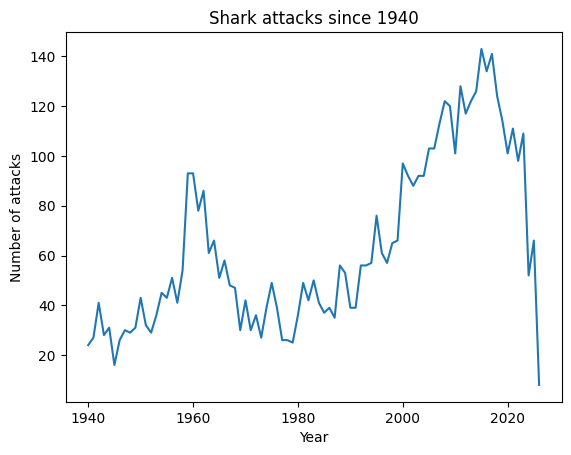

In [39]:
import matplotlib.pyplot as plt
df_1940.groupby("Year").size().plot()
plt.xlabel("Year")
plt.ylabel("Number of attacks")
plt.title("Shark attacks since 1940")
plt.show()


It seems like it has sort of a upwards trend. But you acn also see its almost bimodal. There are 2 peaks at most points its increasing but theres some points where its decreasing.

In [40]:
df_1940["Age"] = pd.to_numeric(df_1940["Age"], errors="coerce")
ages = df_1940["Age"].dropna()


/tmp/ipython-input-1502711339.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1940["Age"] = pd.to_numeric(df_1940["Age"], errors="coerce")


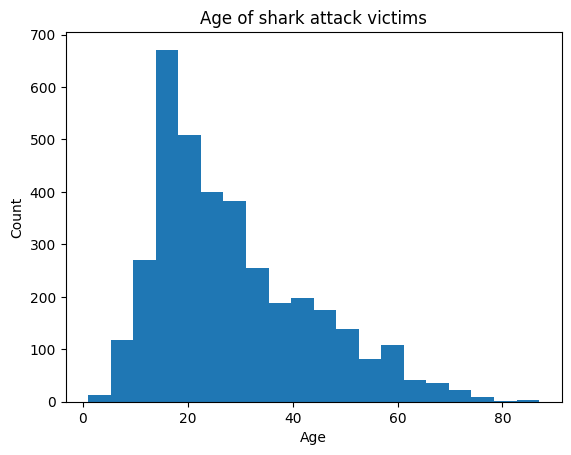

In [41]:
plt.hist(ages, bins=20)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age of shark attack victims")
plt.show()


In [42]:
df_1940["Type"] = df_1940["Type"].str.strip().str.capitalize()

df_1940["Type"] = df_1940["Type"].where(
    df_1940["Type"].isin(["Provoked", "Unprovoked"]),
    "Unknown"
)


/tmp/ipython-input-611868863.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1940["Type"] = df_1940["Type"].str.strip().str.capitalize()
/tmp/ipython-input-611868863.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1940["Type"] = df_1940["Type"].where(


In [43]:
type_counts = df_1940["Type"].value_counts(normalize=True)
type_counts


,proportion
Type,
Unprovoked,0.744850
Unknown,0.160643
Provoked,0.094507


In [44]:
df_1940["Fatal Y/N"] = df_1940["Fatal Y/N"].str.upper().str.strip()

df_1940["Fatal Y/N"] = df_1940["Fatal Y/N"].where(
    df_1940["Fatal Y/N"].isin(["Y", "N"]),
    "Unknown"
)


/tmp/ipython-input-1314448366.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1940["Fatal Y/N"] = df_1940["Fatal Y/N"].str.upper().str.strip()
/tmp/ipython-input-1314448366.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1940["Fatal Y/N"] = df_1940["Fatal Y/N"].where(


In [45]:
df_1940["Fatal"] = df_1940["Fatal Y/N"] == "Y"

fatal_rates = df_1940.groupby("Type")["Fatal"].mean()
fatal_rates


/tmp/ipython-input-3940532180.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1940["Fatal"] = df_1940["Fatal Y/N"] == "Y"


,Fatal
Type,
Provoked,0.024857
Unknown,0.138358
Unprovoked,0.168122


Provoked shows higher fatilities. Unprovoked occur more but death is less frequent.

**Q3.** Open the "tidy_data.pdf" document available in `https://github.com/ds4e/wrangling`, which is a paper called *Tidy Data* by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?

1. This paper is about finding a easier way to clean data.
2. Tidy data provides a shared dataset structure. The goal of this is to ease cleaning and analysis. Having a shared structure it it decreaes the time to setup. Also give analyts more time on questions instead of data logistics.
3. I think the first sentence can mean like all tidy datasets have the same structure. Messy data sets dont follow rules. And no single pattern displays all messiness. The second sentence can mean something like within a specific dataset you're evaluating, you know what the observations and what the variables are, just by looking at context.
4. Values: collection in a dataset (numbers: quantitative, strings: qualitative). Variable: contains all vaus that measure the same underlying atribute across units. Observation: contains all values measure on the same unit across attributes.
5. Tidy data: is defined by three things. One being each variable forms a column. Second each observation forms a row. And thrid each type of observational unit forms a table.
6. Column headers are values, not variable names. Multiple variables are stored in one column. Variables are stored in both rows and columns. Multiple types of observational units are stored in the same table. A single observational unit is stored in multiple tables. Melting a dataset means you turn columns into rows. It's messy because variable there are forming both rows and columns.
7. Table 11 is messy because the day numbers are displayed as column headers d1, d2... The headers are value of a day variable not variable names. Table 12 is molten because the say and temperature move into rows. The structure improves. Each cell holding one value.

**Q4.** This question looks at financial transfers from international actors to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going?

For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
5. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.
6. Which giftors provide the most money, in total?

In [46]:
df_gifts = pd.read_csv('/content/data/ForeignGifts_edu.csv', encoding='latin1')
df_gifts.shape
df_gifts.head()

,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
0,1,102000,Jacksonville State University,Jacksonville,AL,43738,250000,Monetary Gift,CHINA,NaN
1,2,104700,Troy University,Troy,AL,43592,463657,Contract,CHINA,Confucius Institute Headquarters
2,3,105100,University of Alabama,Tuscaloosa,AL,43466,3649107,Contract,ENGLAND,Springer Nature Customer Service Ce
3,4,105100,University of Alabama,Tuscaloosa,AL,43472,1000,Contract,SAUDI ARABIA,Saudi Arabia Education Mission
4,5,105100,University of Alabama,Tuscaloosa,AL,43479,49476,Contract,SAUDI ARABIA,Saudi Arabia Education Mission


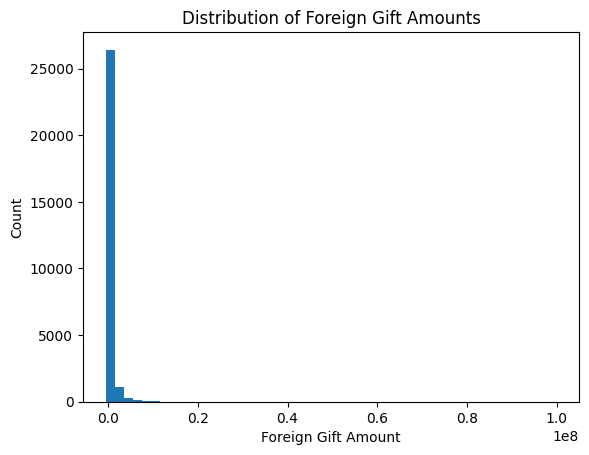

In [47]:
df_gifts["Foreign Gift Amount"] = pd.to_numeric(df_gifts["Foreign Gift Amount"], errors="coerce")

plt.hist(df_gifts["Foreign Gift Amount"].dropna(), bins=50)
plt.xlabel("Foreign Gift Amount")
plt.ylabel("Count")
plt.title("Distribution of Foreign Gift Amounts")
plt.show()

Findings in this dataset is that all foreign gits are small. Very strong right skew.

In [48]:
gift_counts = df_gifts["Gift Type"].value_counts(normalize=True)
gift_counts

,proportion
Gift Type,
Contract,0.612097
Monetary Gift,0.387513
Real Estate,0.000390


Real estate is very small. Contracts are 61% of the proportion and monetary gits are 39%.

In [49]:
top_countries_count = (
    df_gifts.groupby("Country of Giftor")
    .size()
    .sort_values(ascending=False)
    .head(15)
)

top_countries_count


,0
Country of Giftor,
ENGLAND,3655
CHINA,2461
CANADA,2344
JAPAN,1896
SWITZERLAND,1676
SAUDI ARABIA,1610
FRANCE,1437
GERMANY,1394
HONG KONG,1080


In [50]:
top_countries_amount = (
    df_gifts.groupby("Country of Giftor")["Foreign Gift Amount"]
    .sum()
    .sort_values(ascending=False)
    .head(15)
)

top_countries_amount


,Foreign Gift Amount
Country of Giftor,
QATAR,2706240869
ENGLAND,1464906771
CHINA,1237952112
SAUDI ARABIA,1065205930
BERMUDA,899593972
CANADA,898160656
HONG KONG,887402529
JAPAN,655954776
SWITZERLAND,619899445


In [51]:
top_institutions = (
    df_gifts.groupby("Institution Name")["Foreign Gift Amount"]
    .sum()
    .sort_values(ascending=False)
    .head(15)
)
top_institutions

,Foreign Gift Amount
Institution Name,
Carnegie Mellon University,1477922504
Cornell University,1289937761
Harvard University,954803610
Massachusetts Institute of Technology,859071692
Yale University,613441311
Texas A&M University,521455050
Johns Hopkins University,502409595
Northwestern University,402316221
Georgetown University,379950511


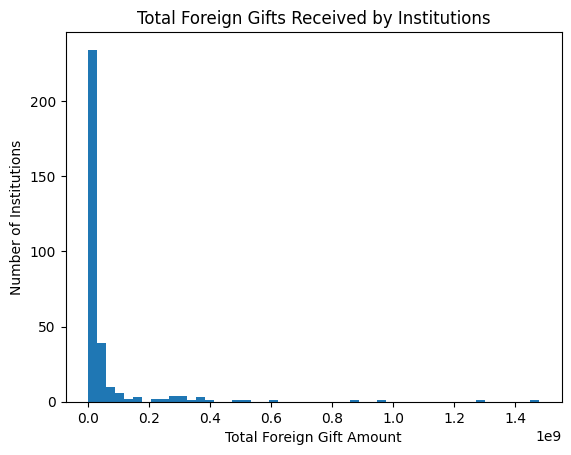

In [52]:
institution_totals = (
    df_gifts.groupby("Institution Name")["Foreign Gift Amount"].sum()
)

plt.hist(institution_totals, bins=50)
plt.xlabel("Total Foreign Gift Amount")
plt.ylabel("Number of Institutions")
plt.title("Total Foreign Gifts Received by Institutions")
plt.show()


Most institutions receive small totals, frew have large sums.

In [53]:
top_giftors = (
    df_gifts.groupby("Giftor Name")["Foreign Gift Amount"]
    .sum()
    .sort_values(ascending=False)
    .head(15)
)

top_giftors


,Foreign Gift Amount
Giftor Name,
Qatar Foundation,1166503744
Qatar Foundation/Qatar National Res,796197000
Qatar Foundation for Education,373945215
Anonymous,338793629
Saudi Arabian Cultural Mission,275221475
HCL,190000000
Church of Jesus Christ of LDS,185203715
Emirates Institute for Advanced Sc,170641244
QIC,148355497


**Q5.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `college_completion.csv` dataset from the US Department of Education. The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `college_completion.csv` data with Pandas.
2. How many observations and variables are in the data? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see in words.
4. For `grad_100_value`, create a kernel density plot and describe table. Now condition on `control`, and produce a kernel density plot and describe tables for each type of institutional control. Which type of institution appear to have the most favorable graduation rates?
5. Make a scatterplot of `grad_100_value` by `aid_value`, and compute the covariance and correlation between the two variables. Describe what you see. Now make the same plot and statistics, but conditioning on `control`. Describe what you see. For which kinds of institutions does aid seem to vary positively with graduation rates?

In [54]:
df_coll = pd.read_csv('/content/data/college_completion.csv', encoding='latin1')
df_coll.shape
df_coll.head()

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


In [55]:
cross = pd.crosstab(df_coll["control"], df_coll["level"], dropna=False)
cross


level,2-year,4-year
control,,
Private for-profit,465,527
Private not-for-profit,68,1180
Public,926,632


Using the crosstab table you see that Public institutions are more dominant in the 2 year level. Private not-for-profit are in favor of 4 year level. And Private for-profit are evenly distributed between the two.

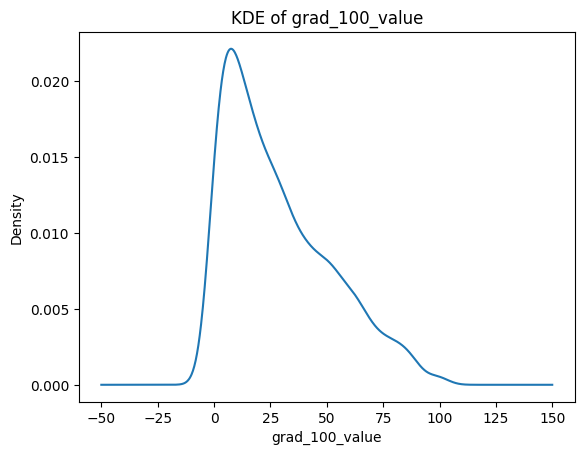

In [56]:
df_coll["grad_100_value"].dropna().plot(kind="kde")
plt.xlabel("grad_100_value")
plt.title("KDE of grad_100_value")
plt.show()

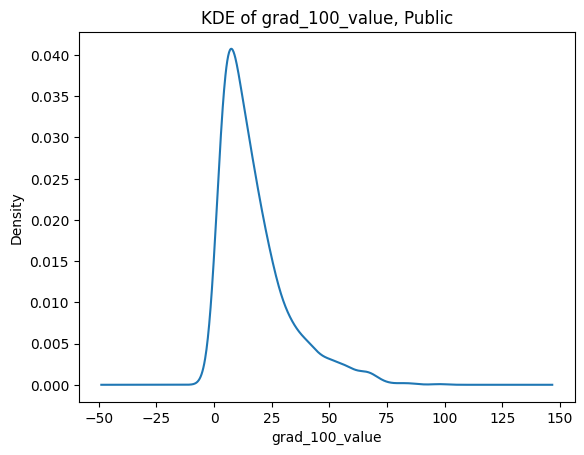

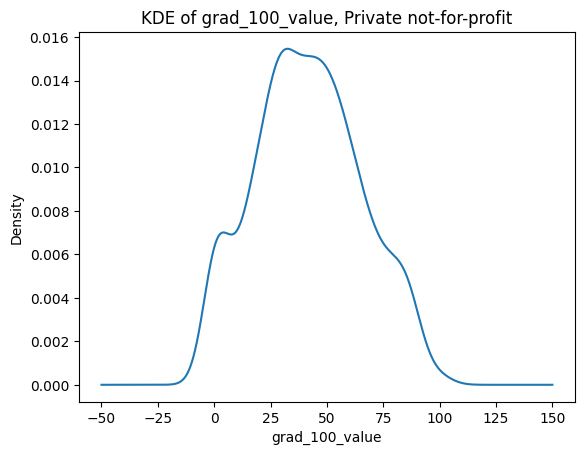

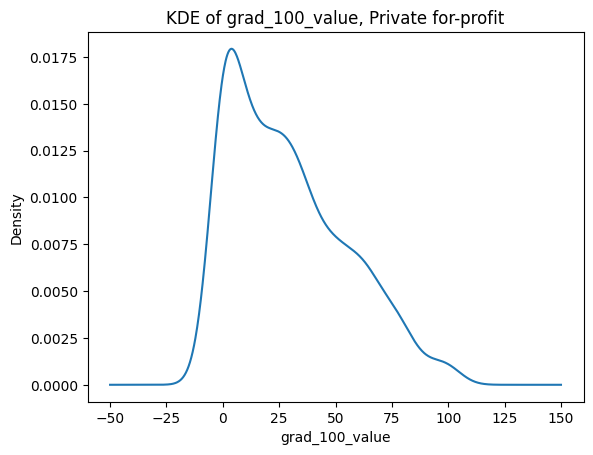

,grad_100_value
count,779.000000
mean,29.108858
std,25.601687
min,0.000000
25%,6.950000
50%,24.700000
75%,46.750000
max,100.000000


In [57]:
df_coll[df_coll["control"] == "Public"]["grad_100_value"].dropna().plot(kind="kde")
plt.xlabel("grad_100_value")
plt.title("KDE of grad_100_value, Public")
plt.show()

df_coll[df_coll["control"] == "Public"]["grad_100_value"].describe()

df_coll[df_coll["control"] == "Private not-for-profit"]["grad_100_value"].dropna().plot(kind="kde")
plt.xlabel("grad_100_value")
plt.title("KDE of grad_100_value, Private not-for-profit")
plt.show()

df_coll[df_coll["control"] == "Private not-for-profit"]["grad_100_value"].describe()

df_coll[df_coll["control"] == "Private for-profit"]["grad_100_value"].dropna().plot(kind="kde")
plt.xlabel("grad_100_value")
plt.title("KDE of grad_100_value, Private for-profit")
plt.show()

df_coll[df_coll["control"] == "Private for-profit"]["grad_100_value"].describe()


According to the graphs I created Private not for porfit instutions have the highest graduation rates

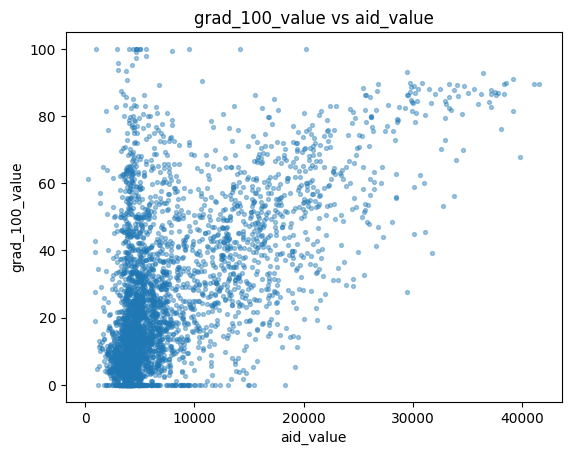

(np.float64(88610.48316902434), np.float64(0.5758792845936073))

In [58]:
x = df_coll["aid_value"]
y = df_coll["grad_100_value"]

plt.scatter(x, y, s=8, alpha=0.4)
plt.xlabel("aid_value")
plt.ylabel("grad_100_value")
plt.title("grad_100_value vs aid_value")
plt.show()

cov_xy = x.cov(y)
corr_xy = x.corr(y)

cov_xy, corr_xy


institutions with higher aid have higher grad rates. Correlaint is positive around 0.58. Covariance is about 88610. there is a positive association between aid and grad rates.

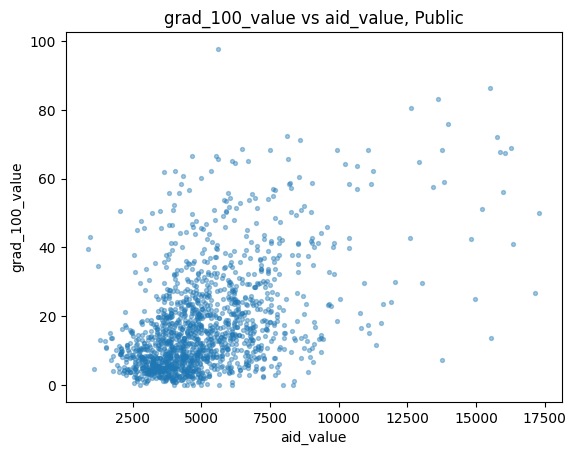

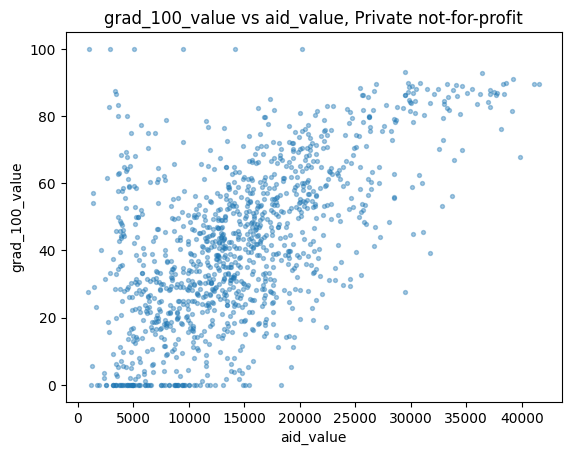

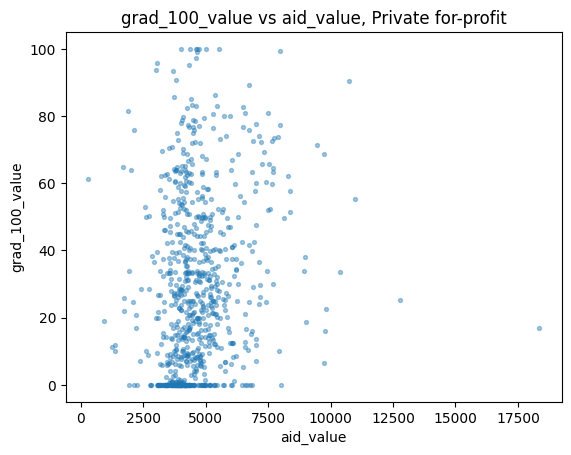

(np.float64(6897.524957237808), np.float64(0.1883627008424557))

In [59]:
pub = df_coll[df_coll["control"] == "Public"]

plt.scatter(pub["aid_value"], pub["grad_100_value"], s=8, alpha=0.4)
plt.xlabel("aid_value")
plt.ylabel("grad_100_value")
plt.title("grad_100_value vs aid_value, Public")
plt.show()

pub["aid_value"].cov(pub["grad_100_value"]), pub["aid_value"].corr(pub["grad_100_value"])

pnfp = df_coll[df_coll["control"] == "Private not-for-profit"]

plt.scatter(pnfp["aid_value"], pnfp["grad_100_value"], s=8, alpha=0.4)
plt.xlabel("aid_value")
plt.ylabel("grad_100_value")
plt.title("grad_100_value vs aid_value, Private not-for-profit")
plt.show()

pnfp["aid_value"].cov(pnfp["grad_100_value"]), pnfp["aid_value"].corr(pnfp["grad_100_value"])

pfp = df_coll[df_coll["control"] == "Private for-profit"]

plt.scatter(pfp["aid_value"], pfp["grad_100_value"], s=8, alpha=0.4)
plt.xlabel("aid_value")
plt.ylabel("grad_100_value")
plt.title("grad_100_value vs aid_value, Private for-profit")
plt.show()

pfp["aid_value"].cov(pfp["grad_100_value"]), pfp["aid_value"].corr(pfp["grad_100_value"])


For private not for profit you can see a positive correlation between the two.

**Q6.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

We're going to look at **linear transformations** of $X$, $Y = a + bX$. So we take each value of $X$, $x_i$, and transform it as $y_i = a + b x_i$.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $ \text{cov}(X,X) = s^2$.
3. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
4. Show that $\text{cov}(a+bX,a+bY) = b^2 \text{cov}(X,Y) $. Notice, this also means that $\text{cov}(bX, bX) = b^2 s^2$.
5. Suppose $b>0$ and let the median of $X$ be $\text{med}(X)$. Is it true that the median of $a+bX$ is equal to $a + b \times \text{med}(X)$? Is the IQR of $a + bX$ equal to $a + b \times \text{IQR}(X)$?
6. Show by example that the means of $X^2$ and $\sqrt{X}$ are generally not $(m(X))^2$ and $\sqrt{m(X)}$. So, the results we derived above really depend on the linearity of the transformation $Y = a + bX$, and transformations like $Y = X^2$ or $Y = \sqrt{X}$ will not behave in a similar way.

pdf upload

**Q7.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `ames_prices.csv` dataset. The "relevant" variables for this question are:
  - `price` - Sale price value of the house
  - `Bldg.Type` - Building type of the house (single family home, end-of-unit townhome, duplex, interior townhome, two-family conversion)

1. Load the `college_completion.csv` data with Pandas.
2. Make a kernel density plot of price and compute a describe table. Now, make a kernel density plot of price conditional on building type, and use `.groupby()` to make a describe type for each type of building. Which building types are the most expensive, on average? Which have the highest variance in transaction prices?
3. Make an ECDF plot of price, and compute the sample minimum, .25 quantile, median, .75 quantile, and sample maximum (i.e. a 5-number summary).
4. Make a boxplot of price. Are there outliers? Make a boxplot of price conditional on building type. What patterns do you see?
5. Make a dummy variable indicating that an observation is an outlier.
6. Winsorize the price variable, and compute a new kernel density plot and describe table. How do the results change?

In [60]:
df_ames = pd.read_csv('/content/data/ames_prices.csv', encoding='latin1')

df_ames.shape
df_ames[["price", "Bldg.Type"]].head()


,price,Bldg.Type
0,215000,1Fam
1,105000,1Fam
2,172000,1Fam
3,244000,1Fam
4,189900,1Fam


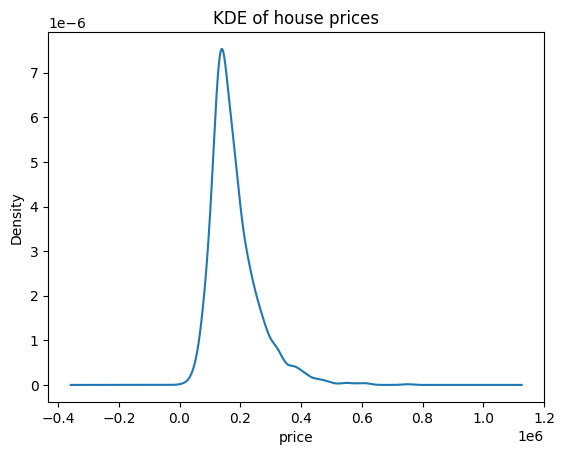

,price
count,2930.000000
mean,180796.060068
std,79886.692357
min,12789.000000
25%,129500.000000
50%,160000.000000
75%,213500.000000
max,755000.000000


In [61]:
df_ames["price"].dropna().plot(kind="kde")
plt.xlabel("price")
plt.title("KDE of house prices")
plt.show()

df_ames["price"].describe()


There's a right skew and most of the homes are selling at lower prices.

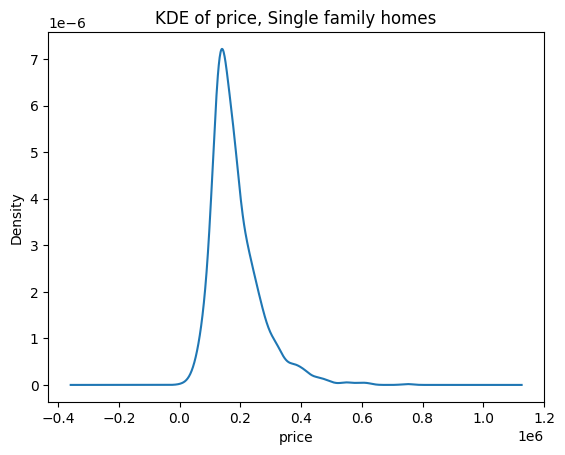

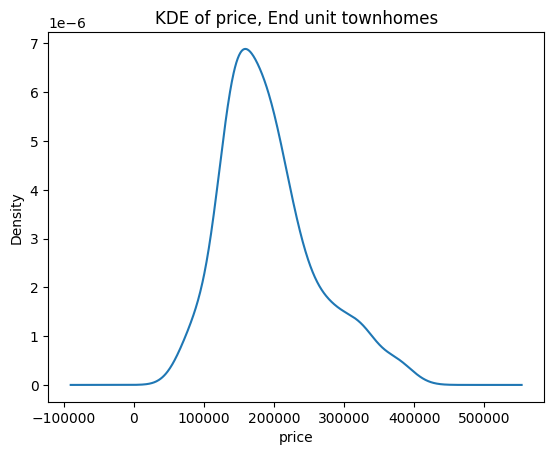

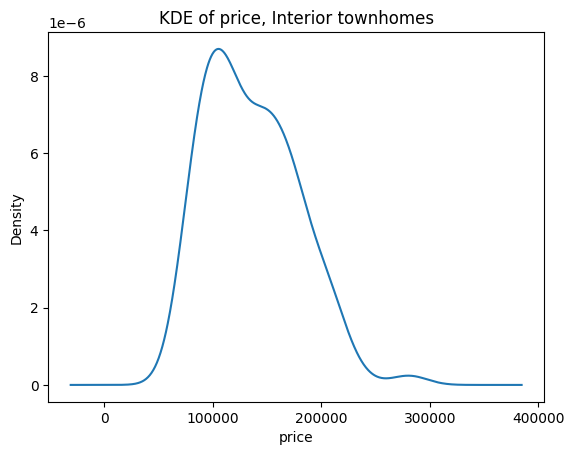

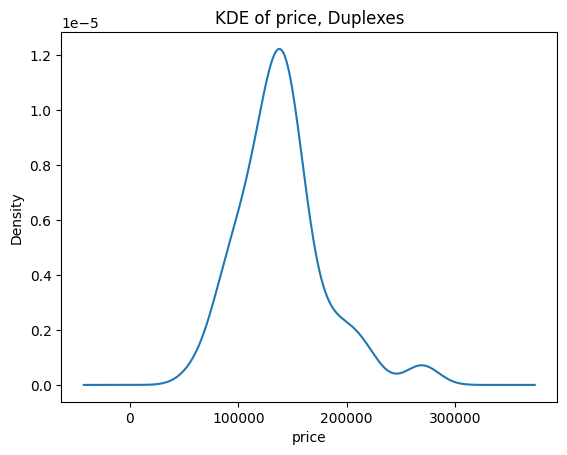

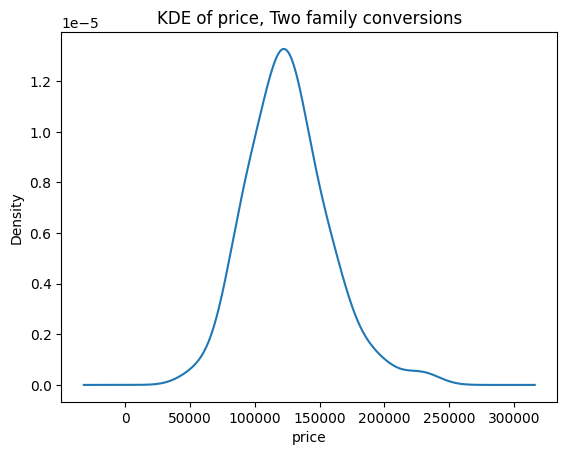

,count,mean,std,min,25%,50%,75%,max
Bldg.Type,,,,,,,,
1Fam,2425.0,184812.041237,82821.802329,12789.0,130000.0,165000.0,220000.0,755000.0
2fmCon,62.0,125581.709677,31089.239840,55000.0,106562.5,122250.0,140000.0,228950.0
Duplex,109.0,139808.935780,39498.973534,61500.0,118858.0,136905.0,153337.0,269500.0
Twnhs,101.0,135934.059406,41938.931130,73000.0,100500.0,130000.0,170000.0,280750.0
TwnhsE,233.0,192311.914163,66191.738021,71000.0,145000.0,180000.0,222000.0,392500.0


In [62]:
df_ames[df_ames["Bldg.Type"] == "1Fam"]["price"].dropna().plot(kind="kde")
plt.xlabel("price")
plt.title("KDE of price, Single family homes")
plt.show()

df_ames[df_ames["Bldg.Type"] == "TwnhsE"]["price"].dropna().plot(kind="kde")
plt.xlabel("price")
plt.title("KDE of price, End unit townhomes")
plt.show()

df_ames[df_ames["Bldg.Type"] == "Twnhs"]["price"].dropna().plot(kind="kde")
plt.xlabel("price")
plt.title("KDE of price, Interior townhomes")
plt.show()

df_ames[df_ames["Bldg.Type"] == "Duplex"]["price"].dropna().plot(kind="kde")
plt.xlabel("price")
plt.title("KDE of price, Duplexes")
plt.show()

df_ames[df_ames["Bldg.Type"] == "2fmCon"]["price"].dropna().plot(kind="kde")
plt.xlabel("price")
plt.title("KDE of price, Two family conversions")
plt.show()

df_ames.groupby("Bldg.Type")["price"].describe()


Single family homes have a higher average pricing.

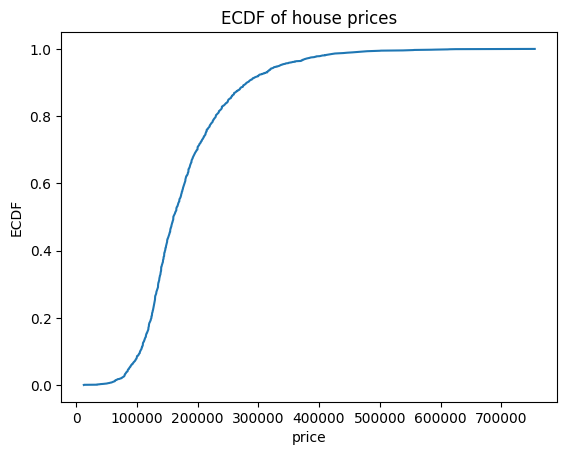

In [63]:
price_sorted = df_ames["price"].dropna().sort_values()
ecdf = price_sorted.rank(method="average", pct=True)

plt.plot(price_sorted, ecdf)
plt.xlabel("price")
plt.ylabel("ECDF")
plt.title("ECDF of house prices")
plt.show()


In [64]:
price_sorted.quantile([0, 0.25, 0.5, 0.75, 1])


,price
0.00,12789.0
0.25,129500.0
0.50,160000.0
0.75,213500.0
1.00,755000.0


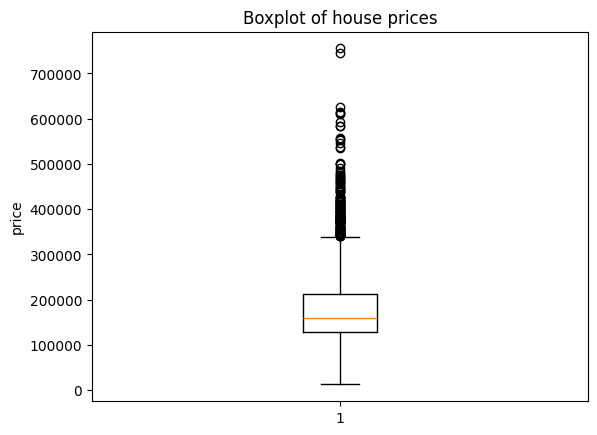

In [65]:
plt.boxplot(df_ames["price"].dropna())
plt.ylabel("price")
plt.title("Boxplot of house prices")
plt.show()


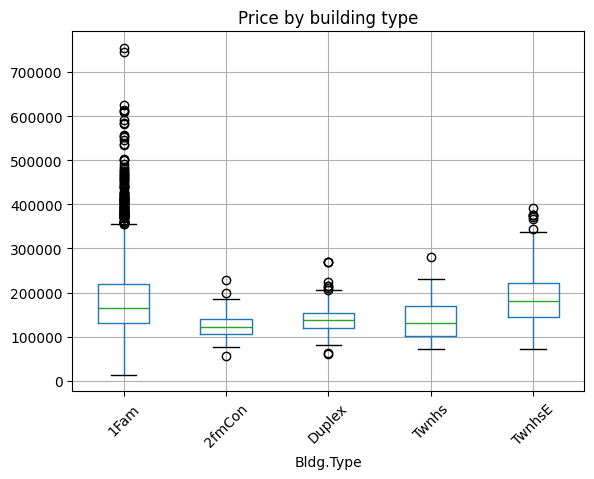

In [66]:
df_ames.boxplot(column="price", by="Bldg.Type", rot=45)
plt.title("Price by building type")
plt.suptitle("")
plt.show()


In [67]:
Q1 = df_ames["price"].quantile(0.25)
Q3 = df_ames["price"].quantile(0.75)
IQR = Q3 - Q1

df_ames["outlier"] = (
    (df_ames["price"] < Q1 - 1.5 * IQR) |
    (df_ames["price"] > Q3 + 1.5 * IQR)
)

df_ames["outlier"].value_counts()


,count
outlier,
False,2793
True,137


In [68]:
lower = df_ames["price"].quantile(0.05)
upper = df_ames["price"].quantile(0.95)

df_ames["price_wins"] = df_ames["price"].clip(lower, upper)


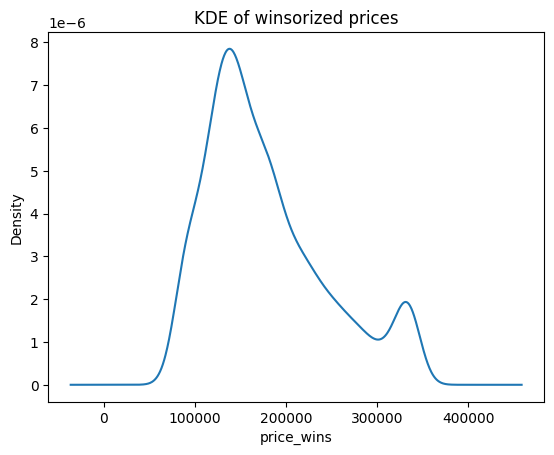

,price_wins
count,2930.000000
mean,177632.528669
std,66195.453960
min,87500.000000
25%,129500.000000
50%,160000.000000
75%,213500.000000
max,335000.000000


In [69]:
df_ames["price_wins"].dropna().plot(kind="kde")
plt.xlabel("price_wins")
plt.title("KDE of winsorized prices")
plt.show()

df_ames["price_wins"].describe()


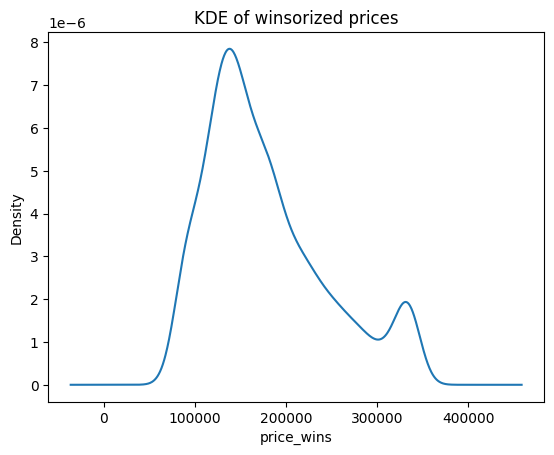

,price_wins
count,2930.000000
mean,177632.528669
std,66195.453960
min,87500.000000
25%,129500.000000
50%,160000.000000
75%,213500.000000
max,335000.000000


In [70]:
df_ames["price_wins"].dropna().plot(kind="kde")
plt.xlabel("price_wins")
plt.title("KDE of winsorized prices")
plt.show()

df_ames["price_wins"].describe()
